In [1]:
from processor import *
from analysis import *
import numpy as np
from scipy.spatial.distance import cdist, pdist
import seaborn as sns
from matplotlib import rcParams

In [2]:
p = CifProcessor()
p.read_pkl_metainfo()
p.read_pkl(mode='rg', folder='data/processed/')

Reading files with generic numbers on receptors and gproteins.


In [3]:
len(p.dfl)

545

In [4]:
f = p.filter_dfl_via_table(State='Active', Cl='Rhodopsin', gprotein=True)

In [5]:
len(f)

77

In [6]:
p.table['Family'].unique()

array(['GPa1family', 'Gi/o', '-', 'Gs', 'Beta', 'Gq/11', 'Visual'],
      dtype=object)

In [7]:
f_gio = p.filter_dfl_via_table(State='Active', Cl='Rhodopsin', Family='Gi/o', gprotein=True)
fuf = f_gio[f_gio['PDB']=='6FUF']
f_gio = f_gio[f_gio['Method']!='X-ray']
# Combine with 6FUF
f_gio = f_gio.append(fuf).reset_index(drop=True)

In [8]:
len(f_gio)

35

In [9]:
f_gio[f_gio['PDB']=='6FUF']

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,Family,Subtype,Function
34,OPSD,Opsins,A(Rhodopsin),Bovine,X-ray,6FUF,3.1,A,Active,100,Gi/o,αo,Agonist


In [10]:
f_gs = p.filter_dfl_via_table(State='Active', Cl='Rhodopsin', Family='Gs', gprotein=True)
len(f_gs)

28

In [11]:
f_q11 = p.filter_dfl_via_table(State='Active', Cl='Rhodopsin', Family='Gq/11', gprotein=True)
len(f_q11)

3

In [12]:
idx = p.dfl_list.index('7L0P')

In [13]:
x = p.dfl[idx]

In [14]:
x

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id
0,7L0P,ATOM,C,A,7,52,ASN,1,N,N,...,NTR1_RAT,N,0,,0.0,0,,,,
1,7L0P,ATOM,C,A,7,52,ASN,2,CA,C,...,NTR1_RAT,N,58,,0.0,0,,,,
2,7L0P,ATOM,C,A,7,52,ASN,3,C,C,...,NTR1_RAT,N,0,,0.0,0,,,,
3,7L0P,ATOM,C,A,7,52,ASN,4,O,O,...,NTR1_RAT,N,0,,0.0,0,,,,
4,7L0P,ATOM,C,A,7,52,ASN,5,CB,C,...,NTR1_RAT,N,0,,0.0,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,7L0P,ATOM,G,E,77,68,LYS,6949,NZ,N,...,NTR1_RAT,K,0,,0.0,0,,,,
6949,7L0P,ATOM,G,E,78,69,GLY,6950,N,N,...,NTR1_RAT,G,0,,0.0,0,,,,
6950,7L0P,ATOM,G,E,78,69,GLY,6951,CA,C,...,NTR1_RAT,G,0,,0.0,0,,,,
6951,7L0P,ATOM,G,E,78,69,GLY,6952,C,C,...,NTR1_RAT,G,0,,0.0,0,,,,


In [15]:
x[(x['label_atom_id'] == 'CA') &
  (x['gen_pos1'] > 7.45) &
  (x['gen_pos1'] < 7.55)]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id
2179,7L0P,ATOM,C,A,293,356,ALA,2180,CA,C,...,NTR1_RAT,A,362,7.46x46?,7.46,46,S,,,
2184,7L0P,ATOM,C,A,294,357,LEU,2185,CA,C,...,NTR1_RAT,L,363,7.47x47?,7.47,47,A,,,
2192,7L0P,ATOM,C,A,295,358,VAL,2193,CA,C,...,NTR1_RAT,V,364,7.48x48?,7.48,48,I,,,
2199,7L0P,ATOM,C,A,296,359,TYR,2200,CA,C,...,NTR1_RAT,Y,365,7.49x49?,7.49,49,N,,,
2211,7L0P,ATOM,C,A,297,360,VAL,2212,CA,C,...,NTR1_RAT,V,366,7.50x50?,7.50,50,P,,,
2218,7L0P,ATOM,C,A,298,361,SER,2219,CA,C,...,NTR1_RAT,S,367,7.51x51?,7.51,51,I,,,
2224,7L0P,ATOM,C,A,299,362,ALA,2225,CA,C,...,NTR1_RAT,A,368,7.52x52?,7.52,52,L,,,
2229,7L0P,ATOM,C,A,300,363,ALA,2230,CA,C,...,NTR1_RAT,A,369,7.53x53?,7.53,53,Y,,,
2234,7L0P,ATOM,C,A,301,364,ILE,2235,CA,C,...,NTR1_RAT,I,370,7.54x54?,7.54,54,N,,,


In [16]:
filtered_indices_gio = [x for x in p.get_dfl_indices(list(f_gio['PDB'])) if x != None]

In [17]:
filtered_indices_gs = [x for x in p.get_dfl_indices(list(f_gs['PDB'])) if x != None]

In [18]:
filtered_indices_q11 = [x for x in p.get_dfl_indices(list(f_q11['PDB'])) if x != None]

In [19]:
print(len(filtered_indices_gio)+len(filtered_indices_gs)+len(filtered_indices_q11))

66


In [20]:
section = 'H5'
poi =  'G.H5.23', 7.50
start = 7.40
end = 8.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]

In [21]:
def get_closest_atoms(res1: pd.DataFrame, res2: pd.DataFrame):
    xyz1 = res1[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
    xyz2 = res2[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
    dists = cdist(xyz1, xyz2)
    print(min(dists))
    idxs = np.armin(dists)
    idx1 = idx[0]
    idx2 = idx[2]
    print(dists[idx[0], idx[1]])
    return res1.iloc[idx1], res2.iloc[idx2]

In [22]:
def dists_to_frame(pdb_id, dists, col_x, col_y):
    df = pd.DataFrame(dists, columns = col_x)
    return df.set_index([col_y])

def get_min_dist_table(l, section='H5', poi=('G.H5.23', 3.50), start=3.40, end=3.53, eps=0.05):
    if (start == None) or (end == None):
        start = poi[1] - eps
        end = poi[1] + eps
    if not isinstance(l, list):
        l = list(l)
    list_dists_df_list = []
    list_poi_list = []

    for i in range(len(l)):
        dists_df_list = []
        poi_list = []
        for j in range(len(l[i])):
            ex = p.dfl[l[i][j]]
            if 'gprot_pos' in ex.columns:
                pdb_id = ex['PDB'].iloc[0]
                r_ids = ex[(ex['gen_pos1'] > start) & 
                           (ex['gen_pos1'] < end)]['label_seq_id'].unique().to_list()
                g_ids = ex[(ex['gprot_pos'].str.contains(section))]['label_seq_id'].unique().to_list()
                r = ex[(ex[['label_seq_id']].isin(r_ids))][['label_seq_id', 'label_atom_id', 
                                                            'Cartn_x', 'Cartn_y', 'Cartn_z']]
                g = ex[(ex[['gprot_pos']].isin(g_ids))][['label_seq_id', 'label_atom_id', 
                                                         'Cartn_x', 'Cartn_y', 'Cartn_z']]
                
                r_idxs = r[['label_seq_id', 'label_atom_id']]
                g_idxs = g[['label_seq_id', 'label_atom_id']]
                
                r_xyz = r[['Cartn_x', 'Cartn_y', 'Cartn_z']]
                g_xyz = g[['Cartn_x', 'Cartn_y', 'Cartn_z']]
                
                dists = get_closest_atoms(r, g)
                
        list_dists_df_list.append(dists_df_list)
        list_poi_list.append(poi_list)
    return list_poi_list, list_dists_df_list

def get_interaction_tables(l, poi=('G.H5.23', 3.50), start=None, end=None, eps=0.05, max_dist=50):
    section = poi[0].split('.')[1]
    if (start == None) or (end == None):
        start = poi[1] - eps
        end = poi[1] + eps
    if not isinstance(l, list):
        l = list(l)
    list_dists_df_list = []
    list_poi_list = []

    for i in range(len(l)):
        dists_df_list = []
        poi_list = []
        for j in range(len(l[i])):
            ex = p.dfl[l[i][j]]
            pdb_id = ex['PDB'].iloc[0]
            if 'gprot_pos' in ex.columns:
                if len(ex[ex['gprot_pos']!=''])>0:
                    col_x = ex[(ex['gen_pos1'] > start) & 
                               (ex['gen_pos1'] < end)&
                               (ex['label_atom_id'] == 'CA')]['gen_pos1'].to_list()
                    ra = ex[(ex['gen_pos1'] > start) &
                           (ex['gen_pos1'] < end) &
                           (ex['label_atom_id'] == 'CA')][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
                    col_y = ex[(ex['gprot_pos'].str.contains(section)) &
                               (ex['label_atom_id'] == 'CA')]['gprot_pos'].to_list()
                    ga = ex[(ex['gprot_pos'].str.contains(section)) &
                               (ex['label_atom_id'] == 'CA')][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
                    if ga.shape[0] * ra.shape[0] > 0:
                        dists = cdist(ra, ga).T
                        dist_df = dists_to_frame(pdb_id, dists, col_x, col_y)
                        if (poi[1] in col_x) & (poi[0] in col_y):
                            if max_dist > dist_df.loc[poi]:
                                poi_value = dist_df.loc[poi]
                            else:
                                poi_value = np.nan
                        else:
                            poi_value = np.nan
                        if (len(col_x) > 0) & (len(col_y) > 0):
                            dists_df_list.append((pdb_id, i, dist_df))
                        if poi_value != np.nan:
                            poi_list.append((pdb_id, i, poi_value))
                    else:
                        print("Did not find specified labels for {} ==> gprot {} | receptor {}"\
                              .format(pdb_id, ga.shape, ra.shape))
                else:
                    print("Did not find ANY gprotein labels:", pdb_id)
                
        list_dists_df_list.append(dists_df_list)
        list_poi_list.append(poi_list)
    return list_poi_list, list_dists_df_list

In [110]:
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=('G.H5.23', 7.5), eps=0.05, max_dist=20)

Did not find specified labels for 6K42 ==> gprot (26, 3) | receptor (0, 3)
Did not find ANY gprotein labels: 6K41
Did not find specified labels for 6VMS ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 6FUF ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7L1V ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 7L1U ==> gprot (26, 3) | receptor (0, 3)


In [111]:
len(list_dists_df_list[0])

31

In [112]:
len(list_dists_df_list[1])

26

In [113]:
len(list_dists_df_list[2])

3

In [114]:
poi_gio = [x for x in list_poi_list[0] if ((x[1] == 0) & (x[2] > 0))]
poi_gs = [x for x in list_poi_list[1] if ((x[1] == 1) & (x[2] > 0))]
poi_q11 = [x for x in list_poi_list[2] if ((x[1] == 2) & (x[2] > 0))]

In [115]:
len(poi_gio) + len(poi_gs) + len(poi_q11)

41

In [116]:
poi_gs

[('7JVQ', 1, 14.416121565802637),
 ('7JVP', 1, 13.67399722100309),
 ('7JV5', 1, 14.158825021872397),
 ('7CFN', 1, 15.935594937121108),
 ('7CFM', 1, 15.923925175659427),
 ('7CKX', 1, 13.797758694802571),
 ('7CKY', 1, 13.62378001877599),
 ('7CKW', 1, 13.48069664371986),
 ('7CKZ', 1, 13.492536825964198),
 ('7CRH', 1, 15.022653427407555),
 ('6E67', 1, 19.093567450845818),
 ('7LJD', 1, 14.023254900343225),
 ('7LJC', 1, 13.72421458590619),
 ('7BZ2', 1, 11.506903927642753),
 ('7DHI', 1, 10.974243390776426),
 ('7DHR', 1, 10.65833504821462)]

In [117]:
poi_gio

[('6LFO', 0, 13.800692663775974),
 ('6LFM', 0, 13.557461746211942),
 ('7JVR', 0, 14.065558574048875),
 ('6WWZ', 0, 14.059728695817727),
 ('7E2Z', 0, 14.558264044864698),
 ('7E33', 0, 12.990892386591462),
 ('7E2X', 0, 14.75683753383496),
 ('7E32', 0, 13.287155677570725),
 ('7E2Y', 0, 14.637969941217936),
 ('6PT0', 0, 14.700481692788173),
 ('7CMU', 0, 14.791513918460142),
 ('7CMV', 0, 14.292318006537641),
 ('6N4B', 0, 14.944011978046584),
 ('6D9H', 0, 13.822886637746842),
 ('6KPF', 0, 14.667265900637393),
 ('6KPG', 0, 14.307645823125481),
 ('6OMM', 0, 12.660183134536389),
 ('6OY9', 0, 15.401570504334936),
 ('6OYA', 0, 14.753186096569104),
 ('6DDF', 0, 15.419080160632138),
 ('6DDE', 0, 14.37807824432737),
 ('6CMO', 0, 17.316741639234564),
 ('6QNO', 0, 16.42449107278518)]

In [118]:
eg = p.dfl_list.index('6OIK')
x = p.dfl[eg]

In [119]:
x[x['gprot_pos'].str.contains('H5.')]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id
3569,6OIK,ATOM,A,B,329,329,THR,3570,CA,C,...,ACM2_HUMAN,T,328,,0.0,0,,G.H5.01,T,T
3574,6OIK,ATOM,A,B,330,330,ASN,3575,CA,C,...,ACM2_HUMAN,N,329,,0.0,0,,G.H5.02,N,N
3582,6OIK,ATOM,A,B,331,331,ASN,3583,CA,C,...,ACM2_HUMAN,N,330,,0.0,0,,G.H5.03,N,N
3590,6OIK,ATOM,A,B,332,332,ILE,3591,CA,C,...,ACM2_HUMAN,I,331,,0.0,0,,G.H5.04,I,I
3598,6OIK,ATOM,A,B,333,333,GLN,3599,CA,C,...,ACM2_HUMAN,Q,332,,0.0,0,,G.H5.05,Q,Q
3607,6OIK,ATOM,A,B,334,334,VAL,3608,CA,C,...,ACM2_HUMAN,V,333,,0.0,0,,G.H5.06,V,V
3614,6OIK,ATOM,A,B,335,335,VAL,3615,CA,C,...,ACM2_HUMAN,V,334,,0.0,0,,G.H5.07,V,V
3621,6OIK,ATOM,A,B,336,336,PHE,3622,CA,C,...,ACM2_HUMAN,F,335,,0.0,0,,G.H5.08,F,F
3632,6OIK,ATOM,A,B,337,337,ASP,3633,CA,C,...,ACM2_HUMAN,D,336,,0.0,0,,G.H5.09,D,D
3640,6OIK,ATOM,A,B,338,338,ALA,3641,CA,C,...,ACM2_HUMAN,A,337,,0.0,0,,G.H5.10,A,A


In [120]:
x[x['label_seq_id']==430]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id


In [121]:
x[(x['gen_pos1']>7.3) &
  (x['gen_pos1']<8.53)]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id
1601,6OIK,ATOM,R,A,272,394,LEU,1602,CA,C,...,ACM2_HUMAN,L,418,7.31x30?,7.31,30,P,,,
1609,6OIK,ATOM,R,A,273,395,ALA,1610,CA,C,...,ACM2_HUMAN,A,419,7.32x31?,7.32,31,N,,,
1614,6OIK,ATOM,R,A,274,396,PHE,1615,CA,C,...,ACM2_HUMAN,F,420,7.33x32?,7.33,32,T,,,
1625,6OIK,ATOM,R,A,275,397,ILE,1626,CA,C,...,ACM2_HUMAN,I,421,7.34x33?,7.34,33,V,,,
1633,6OIK,ATOM,R,A,276,398,ILE,1634,CA,C,...,ACM2_HUMAN,I,422,7.35x34?,7.35,34,W,,,
1641,6OIK,ATOM,R,A,277,399,THR,1642,CA,C,...,ACM2_HUMAN,T,423,7.36x35,7.36,35,T,,,
1648,6OIK,ATOM,R,A,278,400,TRP,1649,CA,C,...,ACM2_HUMAN,W,424,7.37x36?,7.37,36,I,,,
1662,6OIK,ATOM,R,A,279,401,ALA,1663,CA,C,...,ACM2_HUMAN,A,425,7.38x37?,7.38,37,G,,,
1667,6OIK,ATOM,R,A,280,402,PRO,1668,CA,C,...,ACM2_HUMAN,P,426,7.39x38?,7.39,38,Y,,,
1674,6OIK,ATOM,R,A,281,403,TYR,1675,CA,C,...,ACM2_HUMAN,Y,427,7.40x39?,7.40,39,W,,,


In [122]:
poi_q11

[('6WHA', 2, 13.874283008501733), ('7DFL', 2, 17.029205295609064)]

In [123]:
poi_gio_arr = np.asarray(poi_gio)[:, 2].astype(float)
poi_gs_arr = np.asarray(poi_gs)[:, 2].astype(float)

In [124]:
with open('gq11_350_h523.txt', 'w') as f:
    f.write(str(poi_q11))
with open('gs_350_h523.txt', 'w') as f:
    f.write(str(poi_gs))
with open('gio_350_h523.txt', 'w') as f:
    f.write(str(poi_gio))

In [125]:
poi_gio_arr

array([13.80069266, 13.55746175, 14.06555857, 14.0597287 , 14.55826404,
       12.99089239, 14.75683753, 13.28715568, 14.63796994, 14.70048169,
       14.79151392, 14.29231801, 14.94401198, 13.82288664, 14.6672659 ,
       14.30764582, 12.66018313, 15.4015705 , 14.7531861 , 15.41908016,
       14.37807824, 17.31674164, 16.42449107])

In [126]:
poi_q11

[('6WHA', 2, 13.874283008501733), ('7DFL', 2, 17.029205295609064)]

In [127]:
if len(poi_q11) == 0:
    poi_q11_arr = np.nan
else:
    poi_q11_arr = np.asarray(poi_q11)[:, 2].astype(float)

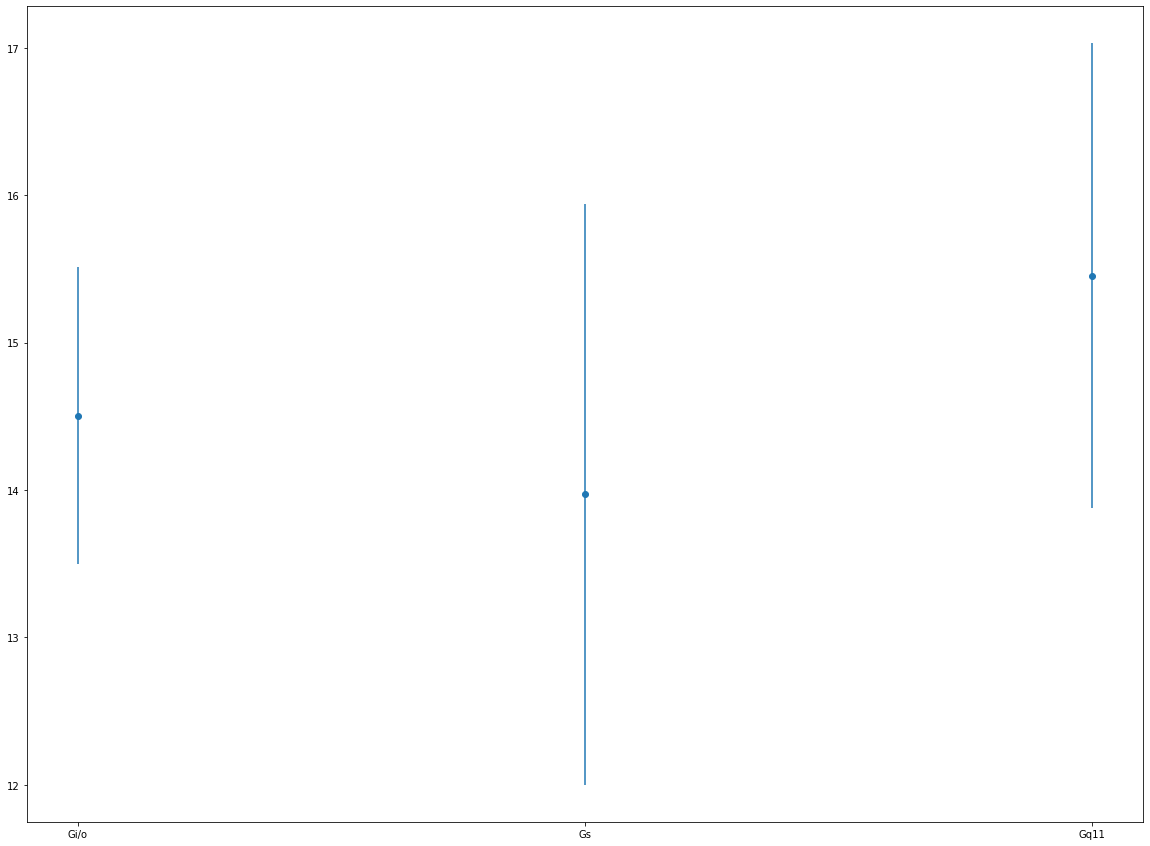

In [128]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(['Gi/o', 'Gs', 'Gq11'])
y = [np.mean(poi_gio_arr), np.mean(poi_gs_arr), np.mean(poi_q11_arr)]
e = np.array([np.std(poi_gio_arr), np.std(poi_gs_arr), np.std(poi_q11_arr)])
plt.errorbar(x, y, e, linestyle='None', fmt='-o')
plt.show()

In [129]:
def get_cell(dataframe, row_idx, col_idx):
    if (row_idx in dataframe.index.to_list()) & (col_idx in dataframe.columns.to_list()):
        return dataframe.loc[row_idx, col_idx].astype(float)
    else:
        return None

In [130]:
def make_overview_df(dists_df_list):
    cols = []
    rows = []
    for i in range(len(dists_df_list)):
        l = dists_df_list[i]
        df = l[2]
        g_ind = df.index.to_list()
        r_ind = df.columns.to_list()
        cols = list(set(cols + r_ind))
        rows = list(set(rows + g_ind))
    occ_df = pd.DataFrame(index=rows, columns=cols)
    mean_df = pd.DataFrame(index=rows, columns=cols)
    std_df = pd.DataFrame(index=rows, columns=cols)
    for i in range(len(rows)):
        for j in range(len(cols)):
            val_list = []
            row_idx = rows[i]
            col_idx = cols[j]
            for k in range(len(dists_df_list)):
                df = dists_df_list[k][2]
                val = get_cell(df, row_idx, col_idx)
                if type(val) == pd.core.series.Series:
                    val = val.iloc[0]
                if val != None:
                    val_list.append(val)
            occ_df.loc[row_idx, col_idx] = len(val_list)
            mean_df.loc[row_idx, col_idx] = np.mean(val_list)
            std_df.loc[row_idx, col_idx] = np.std(val_list)
    occ_df = occ_df.sort_index().reindex(sorted(occ_df.columns), axis=1).astype(int)
    mean_df = mean_df.sort_index().reindex(sorted(mean_df.columns), axis=1).astype(float)
    std_df = std_df.sort_index().reindex(sorted(std_df.columns), axis=1).astype(float)
    return occ_df, mean_df, std_df

In [131]:
def make_overview_plots(df, title='Occurances', cl='A', gprot='Gs', figsize=(20, 15), path='plots/', show=True, save=False):
    name = title + '_' + cl + '_' + gprot
    rcParams['figure.figsize'] = 20, 15
    ax = sns.heatmap(df, cmap='RdYlGn_r', linewidths=.1, annot=True)
    ax.set_title(title + ' ' + cl + ' ' + gprot)
    if show:
        ax.plot()
    if save:
        ax.figure.savefig(path+name+'.png')

# Gio

In [140]:
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=('G.H5.23', 3.5), eps=0.05, max_dist=20)

Did not find specified labels for 6K42 ==> gprot (26, 3) | receptor (0, 3)
Did not find ANY gprotein labels: 6K41
Did not find specified labels for 6VMS ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 6FUF ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7L1V ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 7L1U ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 7JJO ==> gprot (12, 3) | receptor (0, 3)


In [141]:
occ_df, mean_df, std_df = make_overview_df(list_dists_df_list[0])

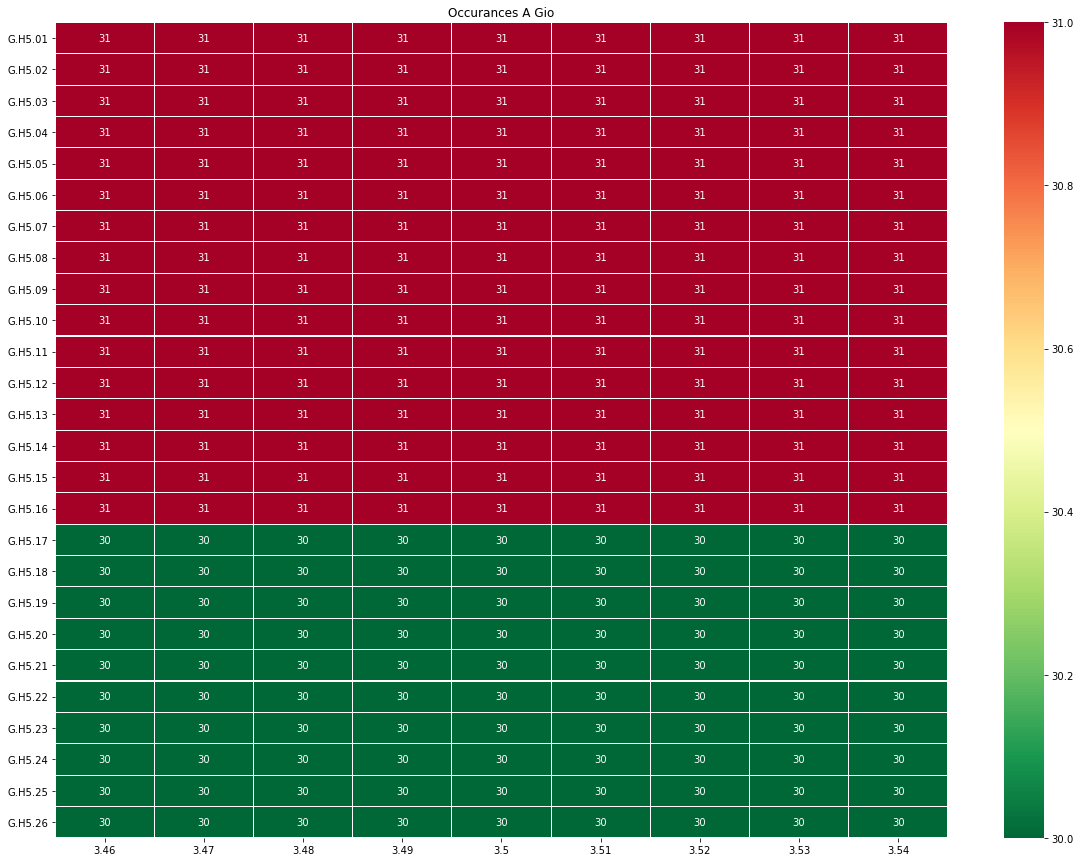

In [142]:
make_overview_plots(occ_df, title='Occurances', cl='A', gprot='Gio', save=True)

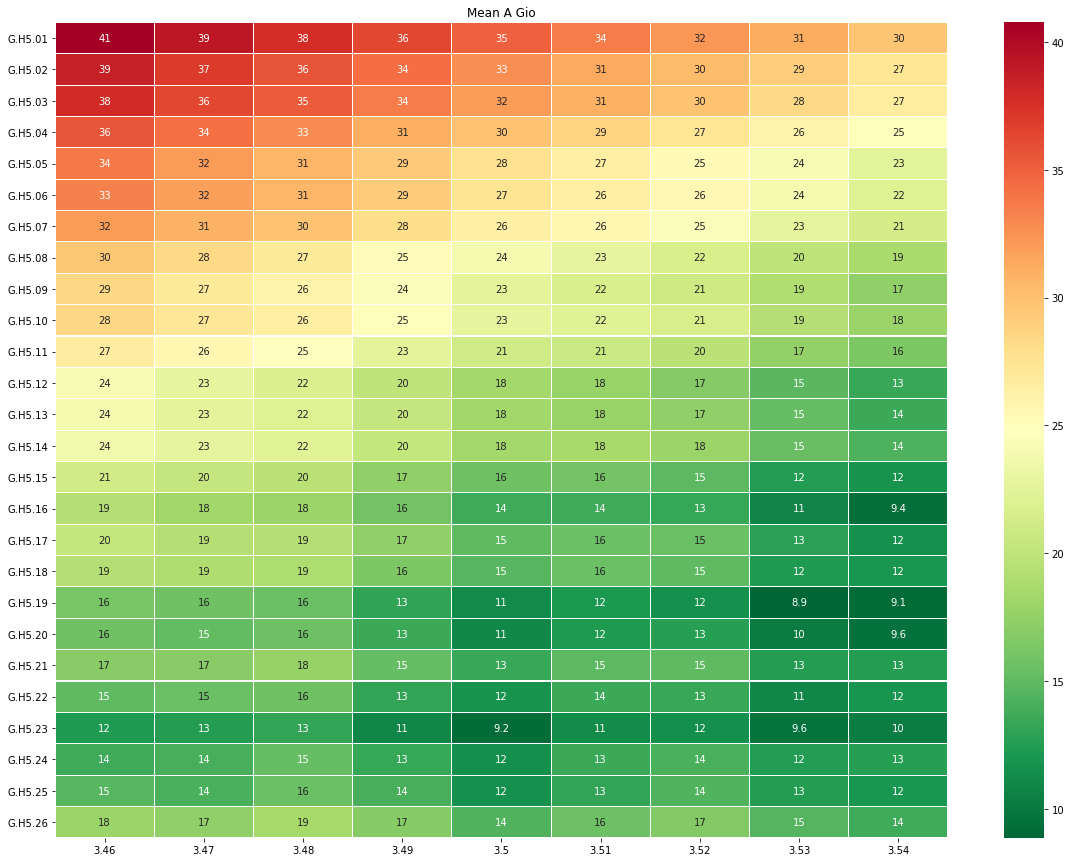

In [143]:
make_overview_plots(mean_df, title='Mean', cl='A', gprot='Gio', save=True)

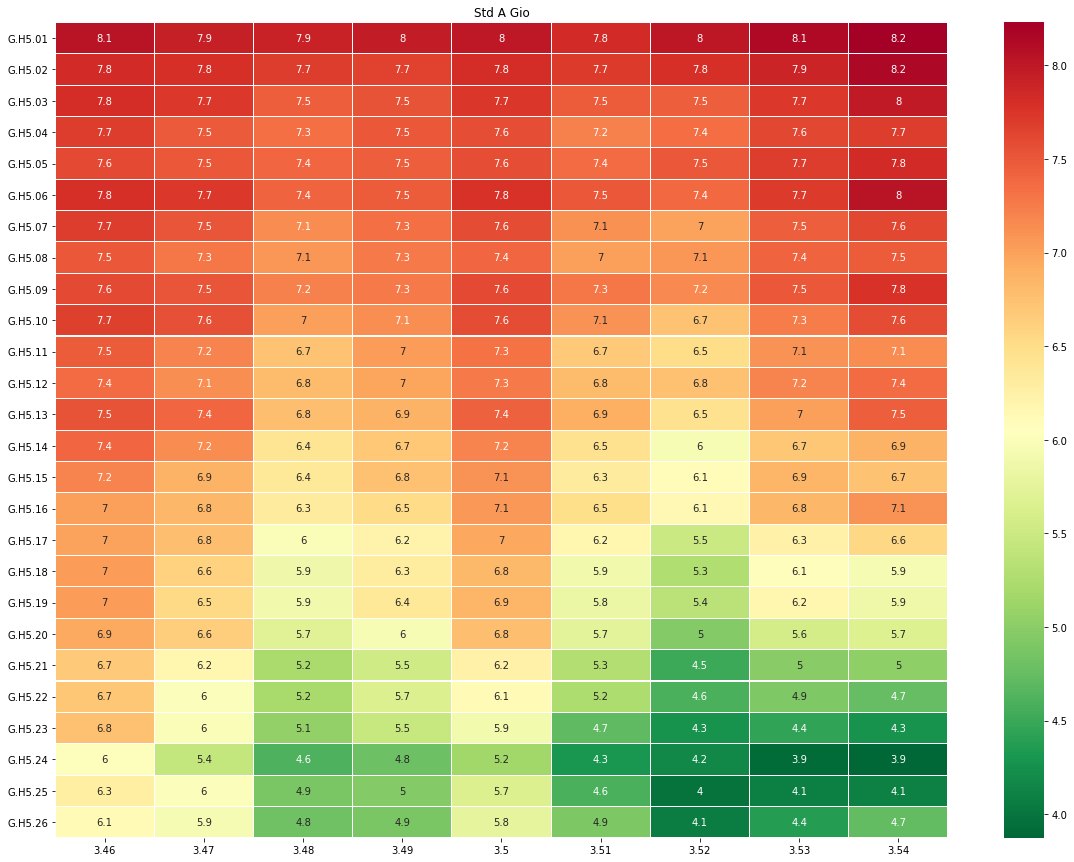

In [144]:
make_overview_plots(std_df, title='Std', cl='A', gprot='Gio', save=True)

# Gs

In [145]:
occ_df, mean_df, std_df = make_overview_df(list_dists_df_list[1])

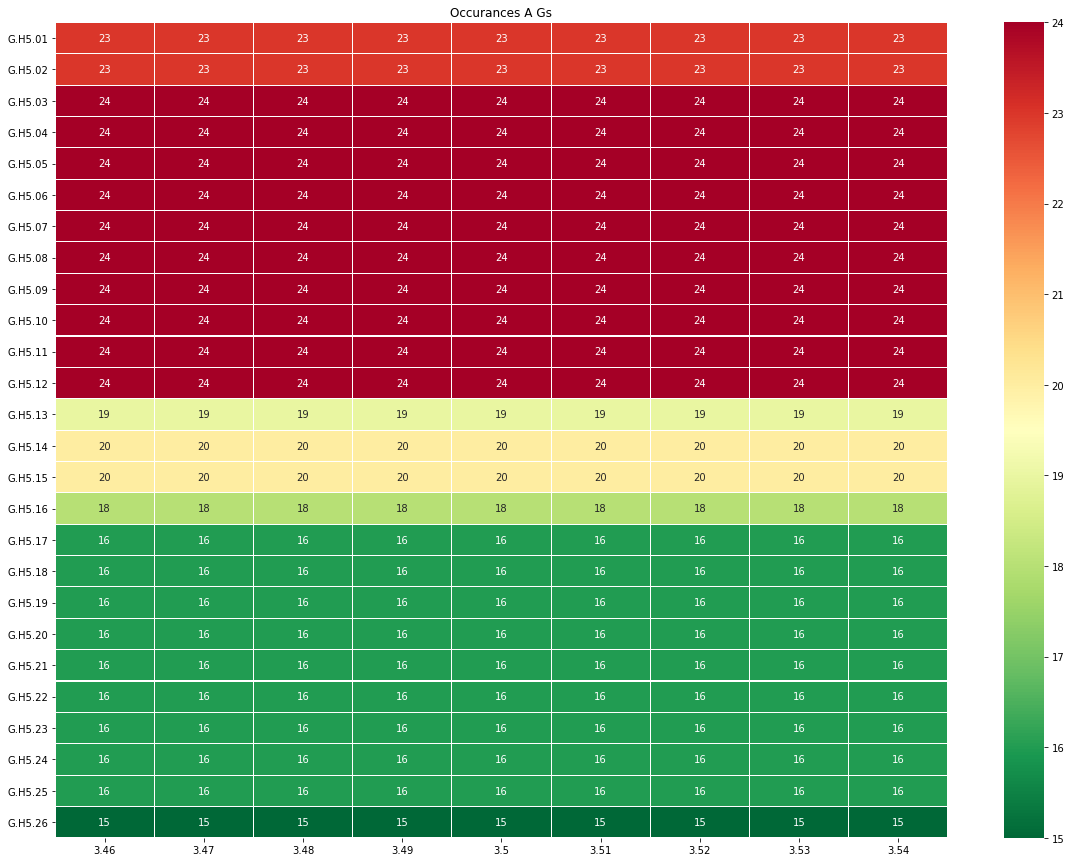

In [146]:
make_overview_plots(occ_df, title='Occurances', cl='A', gprot='Gs', save=True)

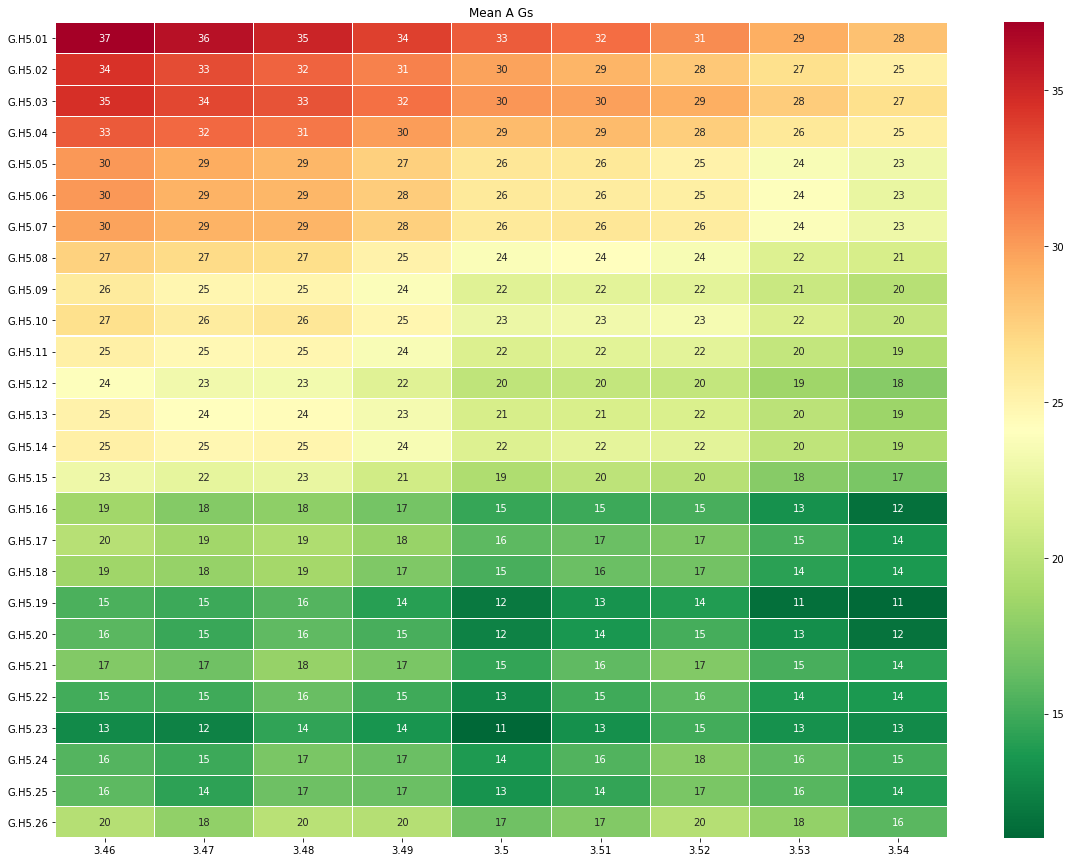

In [147]:
make_overview_plots(mean_df, title='Mean', cl='A', gprot='Gs', save=True)

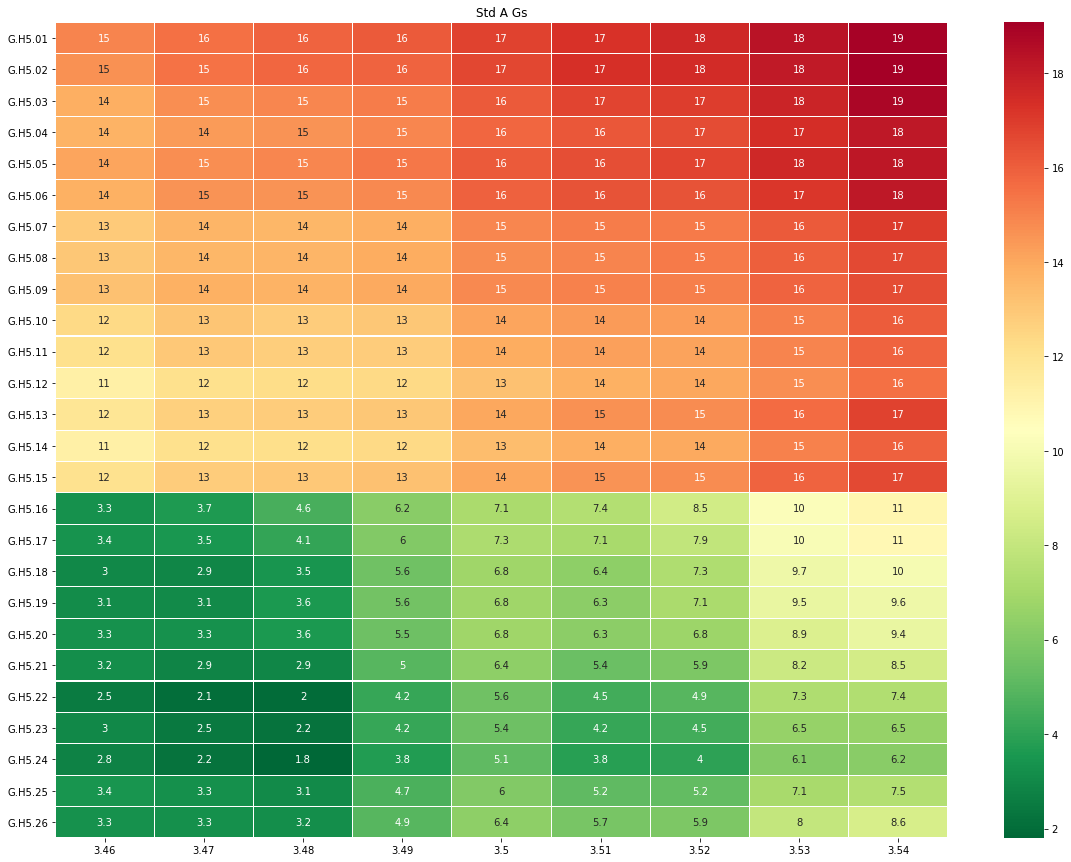

In [148]:
make_overview_plots(std_df, title='Std', cl='A', gprot='Gs', save=True)

In [ ]:
# chimera 11 last residues get changed

# Gq/11

In [149]:
occ_df, mean_df, std_df = make_overview_df(list_dists_df_list[2])

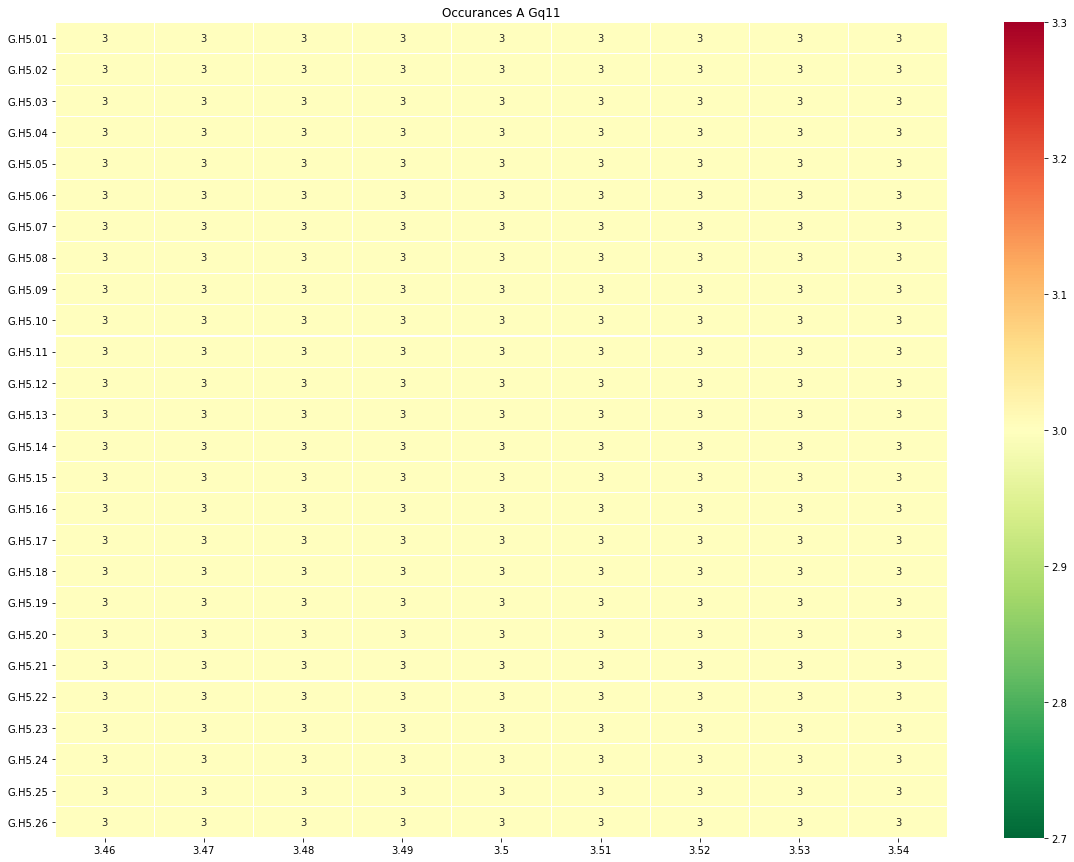

In [150]:
if len(occ_df)>0:
    make_overview_plots(occ_df, title='Occurances', cl='A', gprot='Gq11', save=True)

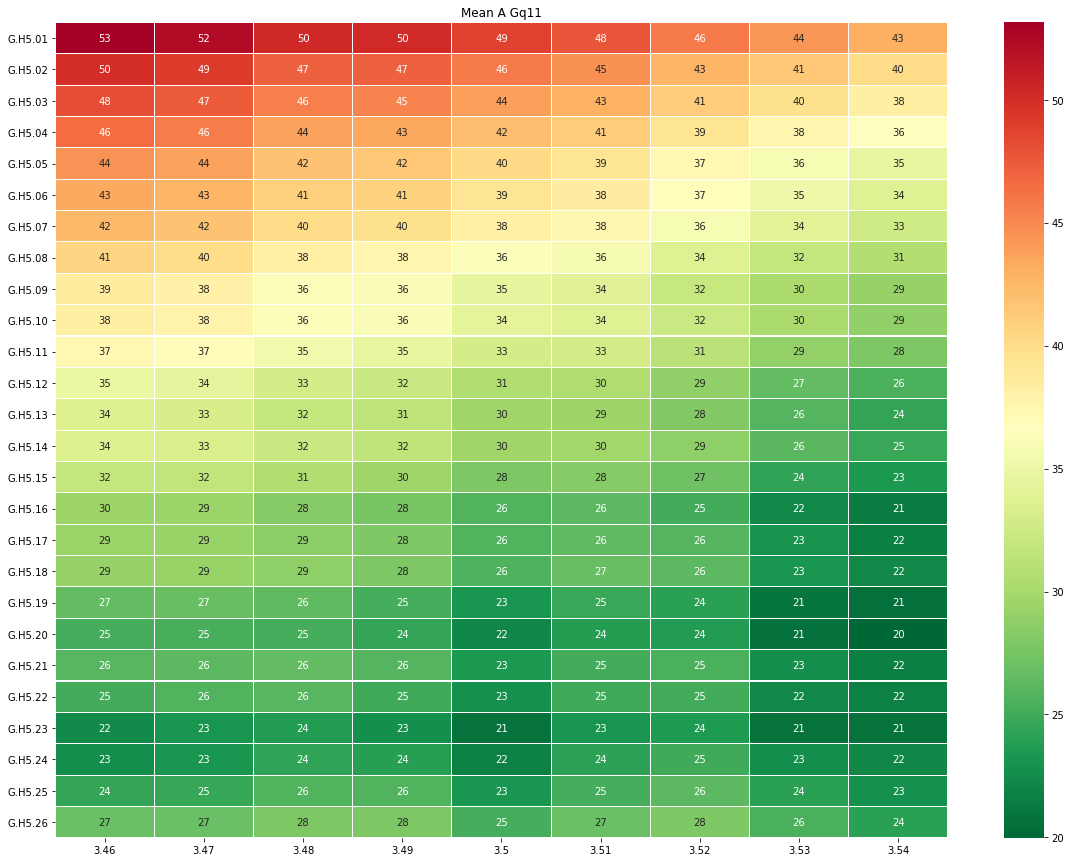

In [151]:
if len(occ_df)>0:
    make_overview_plots(mean_df, title='Mean', cl='A', gprot='Gq11', save=True)

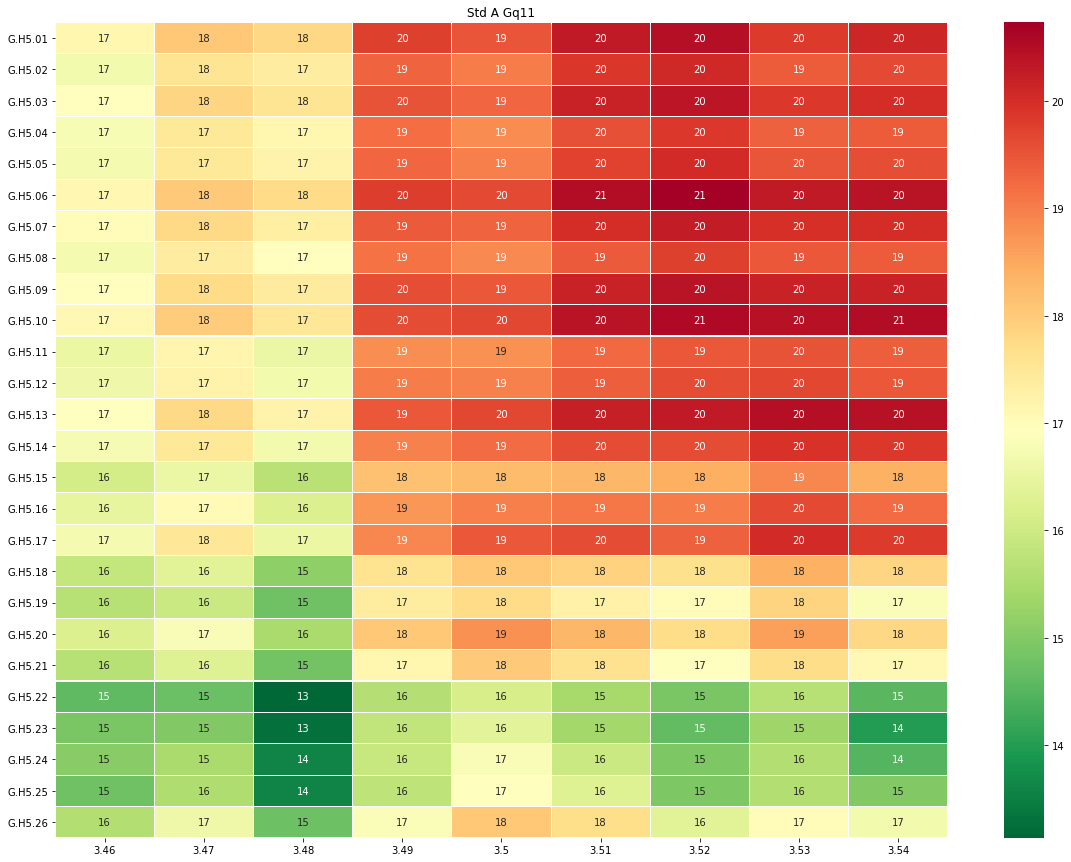

In [152]:
if len(occ_df)>0:
    make_overview_plots(std_df, title='Std', cl='A', gprot='Gq11', save=True)

# Difference

In [55]:
def get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=10):
    col1 = std_df1.columns.to_list()
    col2 = std_df2.columns.to_list()
    ind1 = std_df1.index.to_list()
    ind2 = std_df2.index.to_list()
    if col1 != col2:
        print("receptor gen numbers do not match")
    if ind1 != ind2:
        print("gprotein gen numbers do not match")
    col = sorted(list(set(col1+col2)))
    ind = sorted(list(set(ind1+ind2)))
    val1 = std_df1.to_numpy().astype(float)
    val2 = std_df2.to_numpy().astype(float)
    mask_m1 = mean_df1.to_numpy().astype(float) > cutoff_mean
    mask_m2 = mean_df2.to_numpy().astype(float) > cutoff_mean
    data = val1-val2
    if ab:
        data = np.abs(data)
    data[mask_m1] = np.nan
    data[mask_m2] = np.nan
    return pd.DataFrame(data=data, index=ind, columns=col)

In [56]:
section = 'H5'
poi =  'G.H5.23', 7.50
start = 7.40
end = 8.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]

In [57]:
len(l[0])+len(l[1])+len(l[2])

66

In [58]:
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=poi)

Did not find specified labels for 6K42 ==> gprot (26, 3) | receptor (0, 3)
Did not find ANY gprotein labels: 6K41
Did not find specified labels for 6VMS ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 6FUF ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7L1V ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 7L1U ==> gprot (26, 3) | receptor (0, 3)


In [59]:
occ_df1, mean_df1, std_df1 = make_overview_df(list_dists_df_list[0])
occ_df2, mean_df2, std_df2 = make_overview_df(list_dists_df_list[1])
diff_df = get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=16)

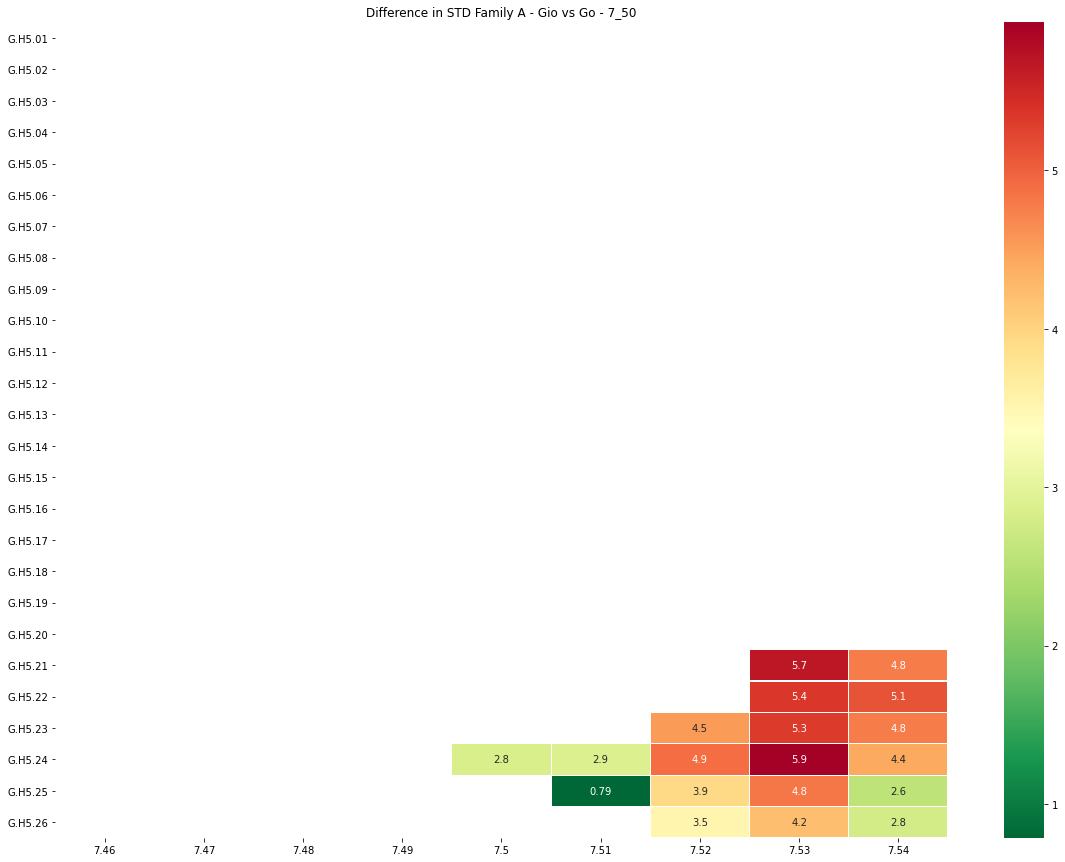

In [60]:
make_overview_plots(diff_df, title='Difference in STD', cl='Family A', gprot='- Gio vs Go - 7_50', save=True)

In red (positive range) we see interactions where the standard-deviation in Gio is greater than in Gs,
In green (negative range) the standard deviation in Gio is smaller than in Gs. Use the Flag "ab" in get_overview_diff to look at absolute differences!

- Gi/o group 1: all the 5h5-smth, ada2b
- Gi/o group 2: the rest

In [157]:
section = 'H5'
poi =  'G.H5.23', 3.5
start = 3.42
end = 3.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=poi, eps=.05)
occ_df1, mean_df1, std_df1 = make_overview_df(list_dists_df_list[0])
occ_df2, mean_df2, std_df2 = make_overview_df(list_dists_df_list[1])
diff_df = get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=12)

Did not find specified labels for 6K42 ==> gprot (26, 3) | receptor (0, 3)
Did not find ANY gprotein labels: 6K41
Did not find specified labels for 6VMS ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 6FUF ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7L1V ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 7L1U ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 7JJO ==> gprot (12, 3) | receptor (0, 3)


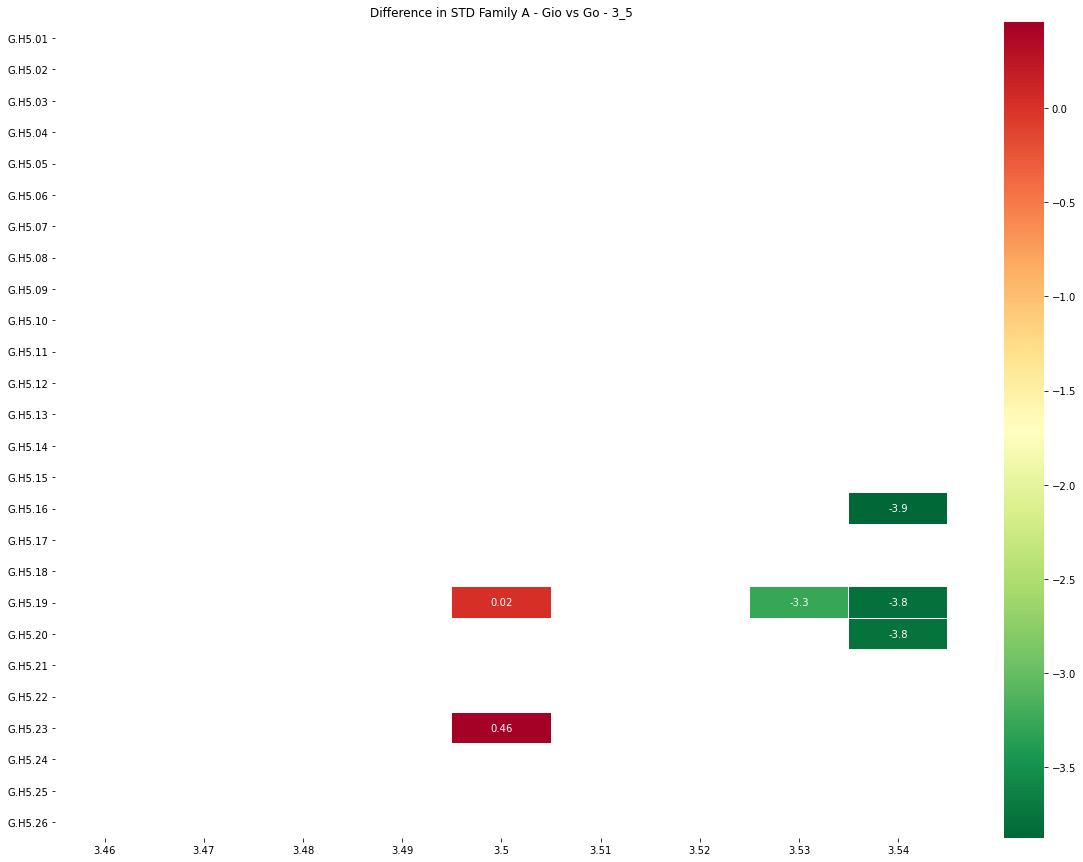

In [158]:
poi_str = list(str(poi[1]))[0] + '_' + ''.join(list(str(poi[1]))[2:])
make_overview_plots(diff_df, title='Difference in STD', cl='Family A', gprot='- Gio vs Go - ' + poi_str, save=True)

In [63]:
section = 'H5'
poi =  'G.H5.23', 7.5
start = 3.42
end = 3.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=poi, eps=.05)
occ_df1, mean_df1, std_df1 = make_overview_df(list_dists_df_list[0])
occ_df2, mean_df2, std_df2 = make_overview_df(list_dists_df_list[1])
diff_df = get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=16)

Did not find specified labels for 6K42 ==> gprot (26, 3) | receptor (0, 3)
Did not find ANY gprotein labels: 6K41
Did not find specified labels for 6VMS ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 6FUF ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7L1V ==> gprot (26, 3) | receptor (0, 3)
Did not find specified labels for 7L1U ==> gprot (26, 3) | receptor (0, 3)


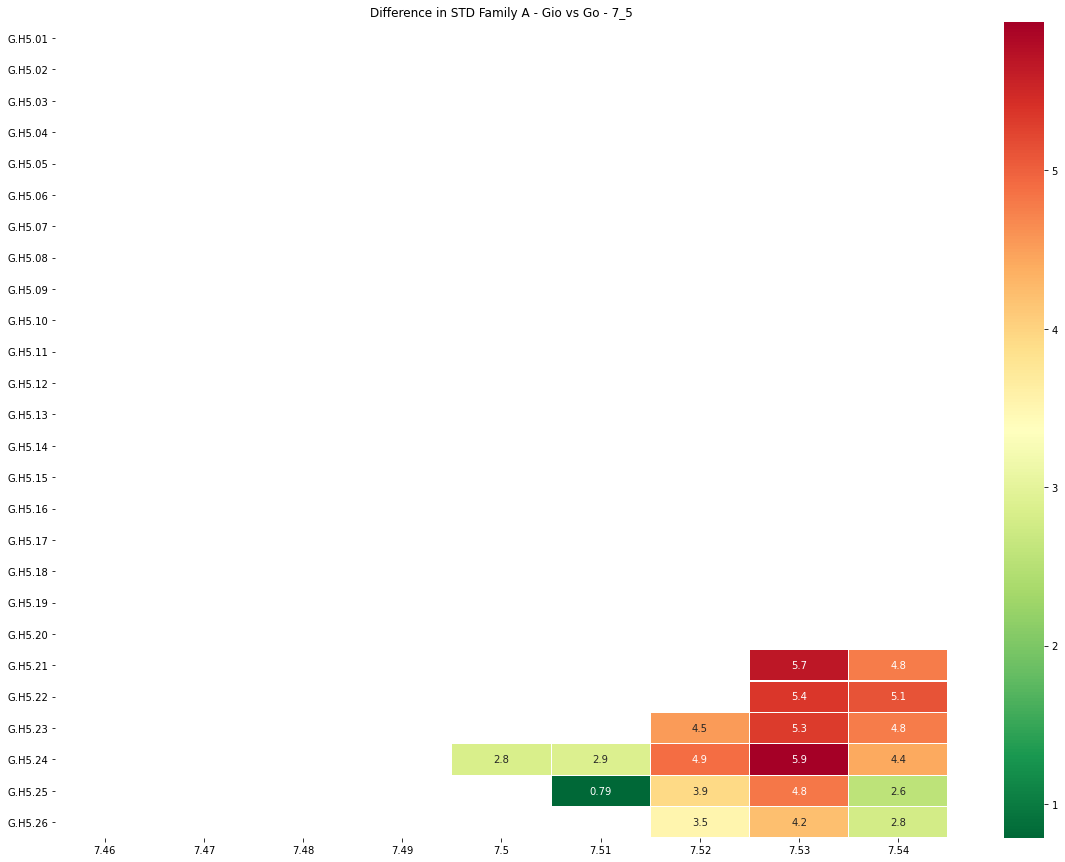

In [64]:
poi_str = list(str(poi[1]))[0] + '_' + ''.join(list(str(poi[1]))[2:])
make_overview_plots(diff_df, title='Difference in STD', cl='Family A', gprot='- Gio vs Go - ' + poi_str, save=True)

In [65]:
#1: update databank, adding h5 gen numbers starting from end
#2: vectors  --> H5: h5.03 - h5.20; R: TM3-> 3.40 - 3.53, HN and H5
#            --> H1-H15, H16-H26
#3: classification of groups
#4: affinities --> 
#5: gq annotate

In [159]:
# https://github.com/getcontacts/getcontacts